In [57]:
import matplotlib
import numpy as np
import pandas as pd
import json

column_names = ['text-id', 'text', 'user-topic', 'target',
                'direct-score',
                'cos-sim-score',
                'gen-CE-1to1-min',
                'gen-CE-1to1-max',
                'gen-CE',
                'gen-cos-sim-min',
                'gen-cos-sim-max',
                'cos-sim-score-base-v2',
                'cos-sim-score-LaBSE',
                'cos-sim-score-googlebert-cased'
                ]
df = pd.DataFrame(columns=column_names)

golden_annotated = json.load(open('../data/gold_annotated_dataset.json'))
direct_scores = json.load(open('../evaluation-data/out-direct-score.json'))
topic_eval = json.load(open('../evaluation-data/out-eval-golden.json'))

sim_scores = json.load(open('../evaluation-data/out_mlm_cos_similarity_scores.json'))
sim_scores_base_v2 = json.load(open('../evaluation-data/out-mlm-mpnet-base-v2.json'))
sim_scores_labSE = json.load(open('../evaluation-data/out-mlm-setu4993LaBSE.json'))
sim_scores_googlebert = json.load(open('../evaluation-data/out-mlm-multilingual-google-bert-cased.json'))


def find_topic_score_1to1(score_list, topic):
    scores = []
    for scorings in score_list:
        for score in scorings:
            if score['from'] == topic:
                scores.append(score['score'])

    return np.min(np.array(scores)), np.max(np.array(scores))


def get_generated_topic_scores_1to1(text_id, topic, scoring_id):
    for text in topic_eval:
        if text['text-id'] == text_id:
            return find_topic_score_1to1(text['scoring'][scoring_id], topic)


def get_direct_score(text_id, topic, json_file):
    print(text_id)
    for score in json_file[text_id]['scores']:
        if score['topic'] == topic:
            return score['similarity']


def get_generated_topic_scores(text_id, topic):
    for text in topic_eval:
        if text['text-id'] == text_id:
            for score in text['scoring']['ce_scores']:
                if score['to'] == topic:
                    return score['score']


for text_id, values in golden_annotated.items():
    for topic, target_label in values['topics'].items():
        print(values)
        direct_score = get_direct_score(text_id, topic, direct_scores)
        cos_sim_score = get_direct_score(text_id, topic, sim_scores)
        cos_sim_score_base_v2 = get_direct_score(text_id, topic, sim_scores_base_v2)
        cos_LaBSE = get_direct_score(text_id, topic, sim_scores_labSE)
        cos_sim_score_googlebert = get_direct_score(text_id, topic, sim_scores_googlebert)


        gen_ce_1to1_min, gen_ce_1to1_max = get_generated_topic_scores_1to1(text_id, topic, 'ce_scores_1to1')
        gen_cos_sim_min, gen_cos_sim_max = get_generated_topic_scores_1to1(text_id, topic, 'mlm_scores_1to1')
        gen_CE = get_generated_topic_scores(text_id, topic)

        scoring = {
            'text-id': text_id,
            'text': values['text'],
            'target': target_label,
            'user-topic': topic,
            'direct-score': direct_score,
            'cos-sim-score': cos_sim_score,
            'cos-sim-score-base-v2': cos_sim_score_base_v2,
            'cos-sim-score-LaBSE': cos_LaBSE,
            'cos-sim-score-googlebert-cased': cos_sim_score_googlebert,

            'gen-CE-1to1-min': gen_ce_1to1_min,
            'gen-CE-1to1-max': gen_ce_1to1_max,
            'gen-CE': gen_CE,
            'gen-cos-sim-max': gen_cos_sim_max,
            'gen-cos-sim-min': gen_cos_sim_min,

        }
        df.loc[len(df)] = scoring

df
# goal:
# list targetu -> vytahnes z data/golden
# list predikci ->
# A) BENES out-direct-score
# B) similarity scores -> eout mlml soc similarity scores
# C) topic modeling -> out - eval golden






{'text': ' <b>Při vychovávání mládeže a ve školách je cvičení těla tak podstatné a potřebné, jako cvičení ducha. U dítěte jest vyvinutí těla přednější, nežli vyvinutí ducha.</b> ', 'topics': {'fyzické cvičení těla': 0, 'cvičení duch': 0, 'výchova mládeže': 0}}
51fa695f-2cba-4d40-b3d0-2ffc4ac3fcbb
51fa695f-2cba-4d40-b3d0-2ffc4ac3fcbb
51fa695f-2cba-4d40-b3d0-2ffc4ac3fcbb
51fa695f-2cba-4d40-b3d0-2ffc4ac3fcbb
51fa695f-2cba-4d40-b3d0-2ffc4ac3fcbb
{'text': ' <b>Při vychovávání mládeže a ve školách je cvičení těla tak podstatné a potřebné, jako cvičení ducha. U dítěte jest vyvinutí těla přednější, nežli vyvinutí ducha.</b> ', 'topics': {'fyzické cvičení těla': 0, 'cvičení duch': 0, 'výchova mládeže': 0}}
51fa695f-2cba-4d40-b3d0-2ffc4ac3fcbb
51fa695f-2cba-4d40-b3d0-2ffc4ac3fcbb
51fa695f-2cba-4d40-b3d0-2ffc4ac3fcbb
51fa695f-2cba-4d40-b3d0-2ffc4ac3fcbb
51fa695f-2cba-4d40-b3d0-2ffc4ac3fcbb
{'text': ' <b>Při vychovávání mládeže a ve školách je cvičení těla tak podstatné a potřebné, jako cvičení du

,text-id,text,user-topic,target,direct-score,cos-sim-score,gen-CE-1to1-min,gen-CE-1to1-max,gen-CE,gen-cos-sim-min,gen-cos-sim-max,cos-sim-score-base-v2,cos-sim-score-LaBSE,cos-sim-score-googlebert-cased
0,51fa695f-2cba-4d40-b3d0-2ffc4ac3fcbb,<b>Při vychovávání mládeže a ve školách je cv...,fyzické cvičení těla,0,1.00,0.494956,0.177472,0.827598,0.906302,0.134220,0.970341,0.559635,0.486537,0.713568
1,51fa695f-2cba-4d40-b3d0-2ffc4ac3fcbb,<b>Při vychovávání mládeže a ve školách je cv...,cvičení duch,0,0.00,0.537356,0.167178,0.941356,0.820471,0.287137,0.730949,0.556186,0.497123,0.631950
2,51fa695f-2cba-4d40-b3d0-2ffc4ac3fcbb,<b>Při vychovávání mládeže a ve školách je cv...,výchova mládeže,0,0.80,0.517673,0.054966,0.970993,0.827335,0.209732,1.000000,0.594536,0.535160,0.607996
3,5445da40-ce98-4f4c-b1a8-e46115ef4166,"<b>Radoval jsem se z toho, že jsem tento druh...",Radost z učení se jazyka,0,0.80,0.499558,0.130061,0.731000,0.681763,0.260069,0.658261,0.527225,0.559927,0.563600
4,5445da40-ce98-4f4c-b1a8-e46115ef4166,"<b>Radoval jsem se z toho, že jsem tento druh...",Radost z porozumění anglickému jazyku,0,0.90,0.594141,0.196436,0.412030,0.587332,0.297020,0.770264,0.630791,0.681355,0.628640
5,4a80bf7d-9e2f-4d60-8751-0c02e643cf61,<b>Ale to je pouze pohyb zdánlivý; právě naop...,filozofie,1,0.10,0.273505,0.028782,0.033338,0.042758,0.320914,0.344077,0.356274,0.387447,0.277240
6,4a80bf7d-9e2f-4d60-8751-0c02e643cf61,<b>Ale to je pouze pohyb zdánlivý; právě naop...,metafora,1,0.80,0.367204,0.027096,0.066238,0.049079,0.310615,0.450505,0.472675,0.484750,0.287801
7,718431bf-885e-439a-bada-3d231c872f78,"<b>Jan Jáchym Winckelmann, narozený 1717 v St...",život v 18. století,1,0.10,0.319783,0.036910,0.156165,0.084449,0.285258,0.372537,0.241302,0.459141,0.580993
8,6a766e56-e3c5-469c-b231-c288de83f73f,<b>Mimo to byla široce rozvětvena práce směřu...,příprava bolševických filosofů,0,0.90,0.662323,0.075605,0.838585,0.894471,0.304536,0.816268,0.707903,0.661768,0.650104
9,330ea01f-e6a6-4842-a065-3ff10f9a5cc3,"<b>To znamená, že i když jest rakouský občan ...",platnost rakouského zákona,0,1.00,0.716266,0.167112,0.852222,0.856409,0.407256,0.663493,0.833439,0.661315,0.603351


 Best Threshold=0.637563, minCdet=17.669, FPR=0.143, FNR=0.211, gen-CE
 Best Threshold=0.405012, minCdet=18.734, FPR=0.190, FNR=0.184, cos-sim-score
 Best Threshold=0.700000, minCdet=25.376, FPR=0.429, FNR=0.079, direct-score
 Best Threshold=0.319839, minCdet=24.311, FPR=0.381, FNR=0.105, gen-CE-1to1-max
 Best Threshold=0.547459, minCdet=21.429, FPR=0.429, FNR=0.000, gen-cos-sim-max
 Best Threshold=0.499415, minCdet=20.050, FPR=0.190, FNR=0.211, cos-sim-score-base-v2
 Best Threshold=0.555239, minCdet=29.511, FPR=0.143, FNR=0.447, cos-sim-score-LaBSE
 Best Threshold=0.586180, minCdet=24.749, FPR=0.048, FNR=0.447, cos-sim-score-googlebert-cased


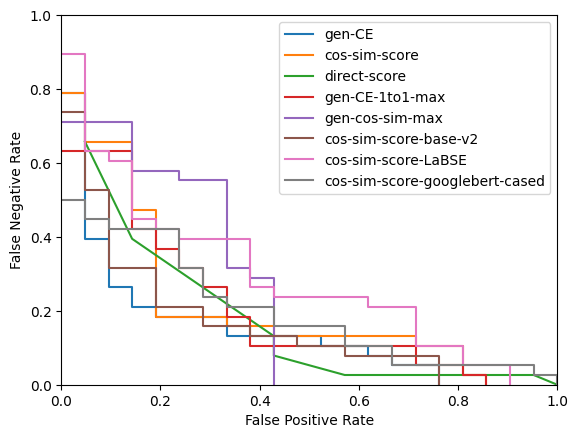

In [62]:
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from sklearn.metrics import det_curve
import matplotlib
from matplotlib.scale import FuncScale
from scipy.stats import norm

from sklearn.metrics import DetCurveDisplay

COLORS = [
    '#1f77b4',  # blue
    '#ff7f0e',  # orange
    '#2ca02c',  # green
    '#d62728',  # red
    '#9467bd',  # purple
    '#8c564b',  # brown
    '#e377c2',  # pink
    '#7f7f7f',  # gray
    '#bcbd22',  # yellow
    '#17becf'   # cyan
]

def add_fpr_tpr_line(ax, fpr, tpr, label):
    """
    Adds a line representing FPR and TPR to the given axes with a label.

    Parameters:
    - ax: The axes object to which the line should be added.
    - fpr: The false positive rate values.
    - tpr: The true positive rate values.
    - label: The label for the line.
    """
    # Convert FPR and TPR values to standard deviation scale

    # Create a Line2D object for the FPR and TPR line with the specified label
    color = COLORS[len(ax.lines) % len(COLORS)]  # Select color from predefined set
    line = lines.Line2D(fpr, tpr, color=color, linewidth=1.5, label=label)

    # Add the line to the axes
    ax.add_line(line)


# Example usage
fig, ax = plt.subplots()

def add_to_det(predictions, label):
    fpr, fnr, thresholds = det_curve(df['target'], predictions, pos_label=0)
    add_fpr_tpr_line(ax, fpr, fnr, label)
    # DetCurveDisplay.from_predictions(1-df['target'], predictions, ax=ax, name=label)
    # print(fpr, fnr)

    Cdets = (fnr + fpr) / 2 * 100
    ix = np.argmin(Cdets)
    print(f' Best Threshold=%f, minCdet=%.3f, FPR=%.3f, FNR=%.3f, {label}' % (thresholds[ix], Cdets[ix], fpr[ix], fnr[ix]))

scores = [
    'gen-CE',
    'cos-sim-score',
    'direct-score',
    'gen-CE-1to1-max',
    'gen-cos-sim-max',
    'cos-sim-score-base-v2',
    'cos-sim-score-LaBSE',
    'cos-sim-score-googlebert-cased'
]

for score in scores:
    add_to_det(df[score], score)


ax.set_xlabel('False Positive Rate')
ax.set_ylabel('False Negative Rate')

# ax.set_yscale('log')
# ax.set_xscale('log')

# ticks_to_use = [0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5,1]
# ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
# ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
# ax.set_xticks(ticks_to_use)
# ax.set_yticks(ticks_to_use)

# Set axis limits
# ax.set_xlim(0.01, 1)
# ax.set_ylim(0.01, 1)
plt.legend()
plt.savefig("DET_ecting_bad_topics.png")

plt.show()

In [59]:
df

,text-id,text,user-topic,target,direct-score,cos-sim-score,gen-CE-1to1-min,gen-CE-1to1-max,gen-CE,gen-cos-sim-min,gen-cos-sim-max,cos-sim-score-base-v2,cos-sim-score-LaBSE,cos-sim-score-googlebert-cased
0,51fa695f-2cba-4d40-b3d0-2ffc4ac3fcbb,<b>Při vychovávání mládeže a ve školách je cv...,fyzické cvičení těla,0,1.00,0.494956,0.177472,0.827598,0.906302,0.134220,0.970341,0.559635,0.486537,0.713568
1,51fa695f-2cba-4d40-b3d0-2ffc4ac3fcbb,<b>Při vychovávání mládeže a ve školách je cv...,cvičení duch,0,0.00,0.537356,0.167178,0.941356,0.820471,0.287137,0.730949,0.556186,0.497123,0.631950
2,51fa695f-2cba-4d40-b3d0-2ffc4ac3fcbb,<b>Při vychovávání mládeže a ve školách je cv...,výchova mládeže,0,0.80,0.517673,0.054966,0.970993,0.827335,0.209732,1.000000,0.594536,0.535160,0.607996
3,5445da40-ce98-4f4c-b1a8-e46115ef4166,"<b>Radoval jsem se z toho, že jsem tento druh...",Radost z učení se jazyka,0,0.80,0.499558,0.130061,0.731000,0.681763,0.260069,0.658261,0.527225,0.559927,0.563600
4,5445da40-ce98-4f4c-b1a8-e46115ef4166,"<b>Radoval jsem se z toho, že jsem tento druh...",Radost z porozumění anglickému jazyku,0,0.90,0.594141,0.196436,0.412030,0.587332,0.297020,0.770264,0.630791,0.681355,0.628640
5,4a80bf7d-9e2f-4d60-8751-0c02e643cf61,<b>Ale to je pouze pohyb zdánlivý; právě naop...,filozofie,1,0.10,0.273505,0.028782,0.033338,0.042758,0.320914,0.344077,0.356274,0.387447,0.277240
6,4a80bf7d-9e2f-4d60-8751-0c02e643cf61,<b>Ale to je pouze pohyb zdánlivý; právě naop...,metafora,1,0.80,0.367204,0.027096,0.066238,0.049079,0.310615,0.450505,0.472675,0.484750,0.287801
7,718431bf-885e-439a-bada-3d231c872f78,"<b>Jan Jáchym Winckelmann, narozený 1717 v St...",život v 18. století,1,0.10,0.319783,0.036910,0.156165,0.084449,0.285258,0.372537,0.241302,0.459141,0.580993
8,6a766e56-e3c5-469c-b231-c288de83f73f,<b>Mimo to byla široce rozvětvena práce směřu...,příprava bolševických filosofů,0,0.90,0.662323,0.075605,0.838585,0.894471,0.304536,0.816268,0.707903,0.661768,0.650104
9,330ea01f-e6a6-4842-a065-3ff10f9a5cc3,"<b>To znamená, že i když jest rakouský občan ...",platnost rakouského zákona,0,1.00,0.716266,0.167112,0.852222,0.856409,0.407256,0.663493,0.833439,0.661315,0.603351
